<a href="https://colab.research.google.com/github/06Cata/Kaggle_Titanic/blob/main/Kaggle_titanic_%E8%B6%85%E5%8F%83%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  一、瞭解資料內容  Checking data content

In [3]:
# 環境準備，使用 Python NumPy、Pandas, Matplolib、Plotly
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
# 資料來源 Data source

url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/train.csv'

df_train = pd.read_csv(url)

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# 讀取資料、查看基本訊息 Import data 、View basic information
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 初步查看個欄位與'Survived'關係，數值型、沒缺少值才可

# Pclass
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# 計算密度估計
pclass_not_survived = df_train[df_train['Survived'] == 0]['Pclass']
pclass_survived = df_train[df_train['Survived'] == 1]['Pclass']

kde_not_survived = gaussian_kde(pclass_not_survived)
kde_survived = gaussian_kde(pclass_survived)

# 設置範圍
pclass_range = np.linspace(0, df_train['Pclass'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(pclass_range)
density_survived = kde_survived(pclass_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=pclass_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=pclass_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Pclass by Survival Status',
    xaxis_title='Pclass',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [8]:
# SibSp

# 計算密度估計
sibsp_not_survived = df_train[df_train['Survived'] == 0]['SibSp']
sibsp_survived = df_train[df_train['Survived'] == 1]['SibSp']

kde_not_survived = gaussian_kde(sibsp_not_survived)
kde_survived = gaussian_kde(sibsp_survived)

# 設置範圍
sibsp_range = np.linspace(0, df_train['SibSp'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(sibsp_range)
density_survived = kde_survived(sibsp_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sibsp_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sibsp_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of SibSp by Survival Status',
    xaxis_title='SibSp',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()



In [9]:
# Parch

# 計算密度估計
parch_not_survived = df_train[df_train['Survived'] == 0]['Parch']
parch_survived = df_train[df_train['Survived'] == 1]['Parch']

kde_not_survived = gaussian_kde(parch_not_survived)
kde_survived = gaussian_kde(parch_survived)

# 設置範圍
parch_range = np.linspace(0, df_train['Parch'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(parch_range)
density_survived = kde_survived(parch_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=parch_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=parch_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Parch by Survival Status',
    xaxis_title='Parch',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()



In [10]:
# Fare
from scipy.stats import gaussian_kde

# 計算密度估計
fare_not_survived = df_train[df_train['Survived'] == 0]['Fare']
fare_survived = df_train[df_train['Survived'] == 1]['Fare']

kde_not_survived = gaussian_kde(fare_not_survived)
kde_survived = gaussian_kde(fare_survived)

# 設置範圍
fare_range = np.linspace(0, df_train['Fare'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(fare_range)
density_survived = kde_survived(fare_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=fare_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=fare_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Fare by Survival Status',
    xaxis_title='Fare',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


# 資料清理

In [11]:
print((df_train['Cabin'].isna().sum()/df_train.shape[0]*100).round(2))

# Cabin 刪除，缺少 77%
# age 數值型，用性別、艙等平均補
# Embarked 用眾數補

77.1


In [12]:
print(df_train['Ticket'].value_counts())
# 不使用

Ticket
1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
            ..
A/5 21172    1
349219       1
234818       1
345364       1
A/5 2466     1
Name: count, Length: 681, dtype: int64


In [13]:
# Age，用性別、艙等平均補
df_train['Age'].fillna(value=df_train.groupby(['Sex','Pclass'])['Age'].transform('mean'),inplace=True)
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [14]:
# Embarked，用眾數補

# # 計算每個 Pclass 中 Embarked 的眾數
# mode_embarked_by_pclass = df_train.groupby('Pclass')['Embarked'].apply(lambda x: x.mode()[0])
# print(mode_embarked_by_pclass)

# # 定義一個函數來填補缺失值
# def fill_embarked(row):
#     if pd.isna(row['Embarked']):
#         return mode_embarked_by_pclass[row['Pclass']]
#     else:
#         return row['Embarked']

# # 應用該函數來填補缺失值
# df_train['Embarked'] = df_train.apply(fill_embarked, axis=1)


mode_embarked = df_train['Embarked'].mode()[0]

df_train['Embarked'].fillna(value=mode_embarked, inplace=True)
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [15]:
# 確認一下
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# 三、轉換資料型態 Converting data type

In [16]:
# Sex、Embarked轉為One-Hot

df_train['Sex_new'] = df_train['Sex'].copy()
df_train['Embarked_new'] = df_train['Embarked'].copy()
df_train = pd.get_dummies(df_train, columns=['Sex_new', 'Embarked_new'], prefix=['Sex_new', 'Embarked_new'])

df_train['Sex_new_female'] = df_train['Sex_new_female'].astype(int)
df_train['Sex_new_male'] = df_train['Sex_new_male'].astype(int)
df_train['Embarked_new_C'] = df_train['Embarked_new_C'].astype(int)
df_train['Embarked_new_Q'] = df_train['Embarked_new_Q'].astype(int)
df_train['Embarked_new_S'] = df_train['Embarked_new_S'].astype(int)

df_train



# df_Embarked_ohe = pd.get_dummies(df_train['Embarked'], prefix='Embarked_')
# df_train = df_train.join(df_Embarked_ohe)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,0,1,1,0,0


In [17]:
# Sex、Embarked轉為LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder_sex_labeled = LabelEncoder()

df_train['Sex_labeled'] = label_encoder_sex_labeled.fit_transform(df_train['Sex'])

label_encoder_embarked_labeled = LabelEncoder()
df_train['Embarked_labeled'] = label_encoder_embarked_labeled.fit_transform(df_train['Embarked'])

df_train


# sex_encoding = {
#     'male': 0,
#     'female': 1
# }
# df_train['Sex_labeled'] = df_train['Sex'].map(lambda d: sex_encoding[d])

# !pip install category_encoders
# from category_encoders.target_encoder import TargetEncoder
# target_encoder = TargetEncoder()
# df_train['Embarked'] = target_encoder.fit_transform(df_train['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,0,1,0,0,1,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,1,0,0,0,1,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,0,1,1,0,0,1,0


In [18]:
# 'Sex' 列的標籤對應關係
sex_mapping = dict(zip(label_encoder_sex_labeled.classes_, label_encoder_sex_labeled.transform(label_encoder_sex_labeled.classes_)))
print("Sex mapping:", sex_mapping)

# 'Embarked' 列的標籤對應關係
embarked_mapping = dict(zip(label_encoder_embarked_labeled.classes_, label_encoder_embarked_labeled.transform(label_encoder_embarked_labeled.classes_)))
print("Embarked mapping:", embarked_mapping)

Sex mapping: {'female': 0, 'male': 1}
Embarked mapping: {'C': 0, 'Q': 1, 'S': 2}


# 四、特徵工程 Feature engineering

In [19]:
# 年齡多一欄，設為年齡組

bins = [0, 21, 45, 65, 100]
labels = ['0-21', '22-45', '46=65', '66-100']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_train['AgeGroup'] = df_train['AgeGroup'].cat.codes  # 轉換為數值

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1,0,0,0,1,0,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,0,1,0,0,1,1,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,1,0,0,0,1,0,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1,0,2,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,0,1,1,0,0,1,0,1


In [20]:
# 年齡組均分，後面再看與['AgeGroup']哪個較準

#
df_train['AgeBin_3'] = pd.qcut(df_train['Age'],3)
df_train['AgeBin_4'] = pd.qcut(df_train['Age'],4)
df_train['AgeBin_5'] = pd.qcut(df_train['Age'],5)


label = LabelEncoder()
df_train['AgeBin_Code_3']=label.fit_transform(df_train['AgeBin_3'])
df_train['AgeBin_Code_4']=label.fit_transform(df_train['AgeBin_4'])
df_train['AgeBin_Code_5']=label.fit_transform(df_train['AgeBin_5'])

# cross tab
df_3 = pd.crosstab(df_train['AgeBin_Code_3'],df_train['Pclass'])
df_4 = pd.crosstab(df_train['AgeBin_Code_4'],df_train['Pclass'])
df_5 = pd.crosstab(df_train['AgeBin_Code_5'],df_train['Pclass'])


display(df_3)
display(df_4)
display(df_5)

Pclass,1,2,3
AgeBin_Code_3,,,
0,39,58,222
1,29,60,187
2,148,66,82


Pclass,1,2,3
AgeBin_Code_4,,,
0,24,39,183
1,20,28,161
2,56,74,90
3,116,43,57


Pclass,1,2,3
AgeBin_Code_5,,,
0,21,35,123
1,23,32,127
2,17,31,138
3,58,52,63
4,97,34,40


<ipython-input-21-50004fb5e864>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-50004fb5e864>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-50004fb5e864>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




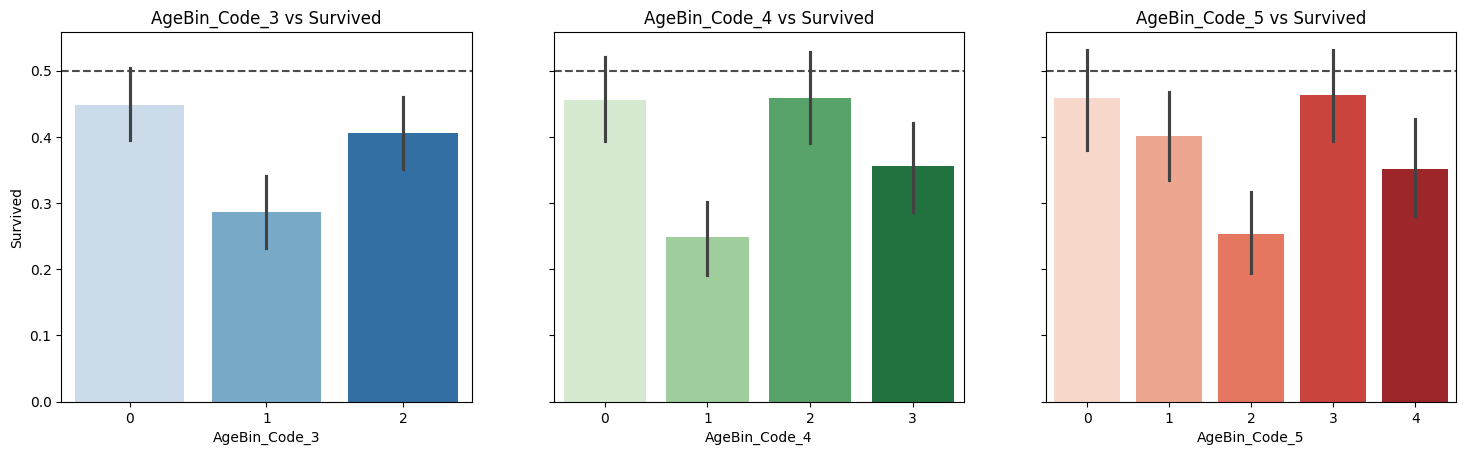

In [21]:
# 年齡分割區間，查看存活率

import matplotlib.pyplot as plt
import seaborn as sns

# 確保 df_train 已經被定義並包含 'AgeBin_Code_3', 'AgeBin_Code_4', 'AgeBin_Code_5' 和 'Survived' 欄位

# 繪製多個圖形
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(18)

for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5, linestyle='dashed', color='black', alpha=0.7)

# 使用 sns.barplot 並設置不同的 palette
sns.barplot(x='AgeBin_Code_3', y='Survived', data=df_train, ax=ax1, palette='Blues')
sns.barplot(x='AgeBin_Code_4', y='Survived', data=df_train, ax=ax2, palette='Greens')
sns.barplot(x='AgeBin_Code_5', y='Survived', data=df_train, ax=ax3, palette='Reds')

# 設置標題
ax1.set_title('AgeBin_Code_3 vs Survived')
ax2.set_title('AgeBin_Code_4 vs Survived')
ax3.set_title('AgeBin_Code_5 vs Survived')

plt.show()


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 假設 df_train 已經加載並包含 'AgeBin_Code_3', 'AgeBin_Code_4', 'AgeBin_Code_5' 和 'Survived' 欄位

X1 = df_train[['AgeBin_Code_3']]
X2 = df_train[['AgeBin_Code_4']]
X3 = df_train[['AgeBin_Code_5']]
y = df_train['Survived']

model = RandomForestClassifier()

# 每種分箱方法的交叉驗證分數
scores_3 = cross_val_score(model, X1, y, cv=5, scoring='accuracy')
scores_4 = cross_val_score(model, X2, y, cv=5, scoring='accuracy')
scores_5 = cross_val_score(model, X3, y, cv=5, scoring='accuracy')

print(f"使用 AgeBin_Code_3 的準確率: {scores_3.mean():.4f} ± {scores_3.std():.4f}")
print(f"使用 AgeBin_Code_4 的準確率: {scores_4.mean():.4f} ± {scores_4.std():.4f}")
print(f"使用 AgeBin_Code_5 的準確率: {scores_5.mean():.4f} ± {scores_5.std():.4f}")

# 選擇 AgeBin_Code_4

使用 AgeBin_Code_3 的準確率: 0.6162 ± 0.0023
使用 AgeBin_Code_4 的準確率: 0.6162 ± 0.0023
使用 AgeBin_Code_5 的準確率: 0.6004 ± 0.0334


In [23]:
df_train = df_train.drop(columns=['AgeBin_3', 'AgeBin_4', 'AgeBin_5', 'AgeBin_Code_3', 'AgeBin_Code_5'])

In [24]:
# 家屬多設一欄，總親屬人數

df_train['Family_size']	= df_train['SibSp'].astype(int) + df_train['Parch'].astype(int) + 1

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled,AgeGroup,AgeBin_Code_4,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,...,0,1,0,0,1,1,2,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,...,1,0,1,0,0,0,0,1,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,1,0,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,...,1,0,0,0,1,0,2,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,...,0,1,0,0,1,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,...,0,1,0,0,1,1,2,1,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,...,1,0,0,0,1,0,2,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,...,1,0,0,0,1,0,2,1,0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,...,0,1,1,0,0,1,0,1,1,1


In [25]:
# 提取名字中的頭銜
df_train['Title'] = df_train['Name'].str.split(", ", expand=True)[1]
df_train['Title_2'] = df_train['Title'].str.split(". ", expand=True)[0]
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_new_C,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled,AgeGroup,AgeBin_Code_4,Family_size,Title,Title_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,...,0,0,1,1,2,1,1,2,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,...,1,0,0,0,0,1,3,2,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,2,1,1,1,Miss. Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,...,0,0,1,0,2,1,2,2,Mrs. Jacques Heath (Lily May Peel),Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,...,0,0,1,1,2,1,2,1,Mr. William Henry,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,...,0,0,1,1,2,1,2,1,Rev. Juozas,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,...,0,0,1,0,2,0,0,1,Miss. Margaret Edith,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,...,0,0,1,0,2,1,0,4,"Miss. Catherine Helen ""Carrie""",Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,...,1,0,0,1,0,1,1,1,Mr. Karl Howell,Mr


In [26]:
df_train['Title_2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
      dtype=object)

In [27]:
df_train.groupby('Title_2')['Age'].mean()

,Age
Title_2,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,41.897341
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,6.767509
Miss,21.916526


In [28]:
# 交叉分析
crosstab_sex = pd.crosstab(df_train['Title_2'], df_train['Sex'])
styled_crosstab_sex = crosstab_sex.T.style.background_gradient(cmap='summer_r')

crosstab_survivrd = pd.crosstab(df_train['Title_2'], df_train['Survived'])
styled_crosstab_survived = crosstab_survivrd.T.style.background_gradient(cmap='summer_r')

styled_crosstab_sex


Title_2,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [29]:
styled_crosstab_survived

Title_2,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [30]:
# 因頭銜過多，提取為 Officer 專業人士、Royalty 特殊地位
# Officer　專業人士：Captain、Colonel、Major、Doctor、Reverend
# Royalty　特殊地位：Jonkheer、Don、Sir、the Countess、Dona、Lady

title_encoding = {
  "Capt":"Officer",
  "Col":"Officer",
  "Major":"Officer",
  "Jonkheer":"Royalty",
  "Don":"Royalty",
  "Sir":"Royalty",
  "Dr":"Officer",
  "Rev": "Officer",
  "the Countess":"Royalty",
  "Dona":"Royalty",
  "Mme":"Mrs",
  "Mlle":"Miss",
  "Ms":"Mrs",
  "Mr":"Mr",
  "Mrs":"Mrs",
  "Miss":"Miss",
  "Master":"Master",
  "Lady":"Royalty"
}

df_train['Title_3'] = df_train['Title_2'].map(title_encoding)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled,AgeGroup,AgeBin_Code_4,Family_size,Title,Title_2,Title_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,...,0,1,1,2,1,1,2,Mr. Owen Harris,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,...,0,0,0,0,1,3,2,Mrs. John Bradley (Florence Briggs Thayer),Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,...,0,1,0,2,1,1,1,Miss. Laina,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,...,0,1,0,2,1,2,2,Mrs. Jacques Heath (Lily May Peel),Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,...,0,1,1,2,1,2,1,Mr. William Henry,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,...,0,1,1,2,1,2,1,Rev. Juozas,Rev,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,...,0,1,0,2,0,0,1,Miss. Margaret Edith,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,...,0,1,0,2,1,0,4,"Miss. Catherine Helen ""Carrie""",Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,...,0,0,1,0,1,1,1,Mr. Karl Howell,Mr,Mr


In [31]:
# 交叉分析
crosstab_sex = pd.crosstab(df_train['Title_3'], df_train['Sex'])
styled_crosstab_sex = crosstab_sex.T.style.background_gradient(cmap='summer_r')

crosstab_survivrd = pd.crosstab(df_train['Title_3'], df_train['Survived'])
styled_crosstab_survived = crosstab_survivrd.T.style.background_gradient(cmap='summer_r')

styled_crosstab_sex

Title_3,Master,Miss,Mr,Mrs,Officer,Royalty
Sex,,,,,,
female,0,184,0,127,1,1
male,40,0,517,0,17,3


In [32]:
styled_crosstab_survived

Title_3,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,
0,17,55,436,26,13,2
1,23,129,81,101,5,2


In [33]:
# Title_3 轉為 One-Hot

df_train['Title_3_new'] = df_train['Title_3'].copy()
df_train = pd.get_dummies(df_train, columns=['Title_3_new'], prefix=['Title_3_new'])

df_train['Title_3_new_Master'] = df_train['Title_3_new_Master'].astype(int)
df_train['Title_3_new_Miss'] = df_train['Title_3_new_Miss'].astype(int)
df_train['Title_3_new_Mr'] = df_train['Title_3_new_Mr'].astype(int)
df_train['Title_3_new_Mrs'] = df_train['Title_3_new_Mrs'].astype(int)
df_train['Title_3_new_Officer'] = df_train['Title_3_new_Officer'].astype(int)
df_train['Title_3_new_Royalty'] = df_train['Title_3_new_Royalty'].astype(int)

df_train = df_train.drop(columns=['Title', 'Title_2',	'Title_3'])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_labeled,AgeGroup,AgeBin_Code_4,Family_size,Title_3_new_Master,Title_3_new_Miss,Title_3_new_Mr,Title_3_new_Mrs,Title_3_new_Officer,Title_3_new_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,...,2,1,1,2,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,...,0,1,3,2,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,...,2,1,1,1,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,...,2,1,2,2,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,...,2,1,2,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,...,2,1,2,1,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,...,2,0,0,1,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,...,2,1,0,4,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,...,0,1,1,1,0,0,1,0,0,0


In [34]:
# 票價

# Making Binsl
df_train['FareBin_4'] = pd.qcut(df_train['Fare'],4)
df_train['FareBin_5'] = pd.qcut(df_train['Fare'],5)
df_train['FareBin_6'] = pd.qcut(df_train['Fare'],6)

label = LabelEncoder()
df_train['FareBin_Code_4']=label.fit_transform(df_train['FareBin_4'])
df_train['FareBin_Code_5']=label.fit_transform(df_train['FareBin_5'])
df_train['FareBin_Code_6']=label.fit_transform(df_train['FareBin_6'])

# cross tab
df_4 = pd.crosstab(df_train['FareBin_Code_4'],df_train['Pclass'])
df_5 = pd.crosstab(df_train['FareBin_Code_5'],df_train['Pclass'])
df_6 = pd.crosstab(df_train['FareBin_Code_6'],df_train['Pclass'])


display(df_4)
display(df_5)
display(df_6)

Pclass,1,2,3
FareBin_Code_4,,,
0,6,6,211
1,0,86,138
2,51,70,101
3,159,22,41


Pclass,1,2,3
FareBin_Code_5,,,
0,6,6,167
1,0,24,160
2,0,80,92
3,64,64,52
4,146,10,20


Pclass,1,2,3
FareBin_Code_6,,,
0,6,6,144
1,0,0,152
2,0,86,53
3,6,53,90
4,76,32,38
5,128,7,14


<ipython-input-35-e8548266ecff>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-e8548266ecff>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-35-e8548266ecff>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




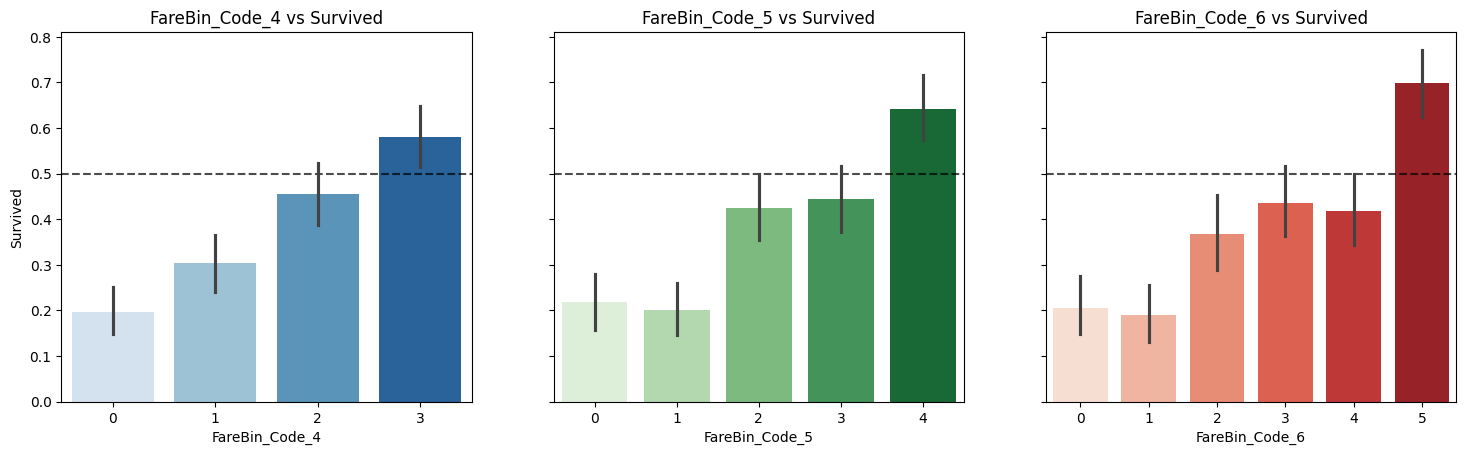

In [35]:
# 票價分割區間，查看存活率

import matplotlib.pyplot as plt
import seaborn as sns

# 確保 df_train 已經被定義並包含 'FareBin_Code_4', 'FareBin_Code_5', 'FareBin_Code_6' 和 'Survived' 欄位

# 繪製多個圖形
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(18)

for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5, linestyle='dashed', color='black', alpha=0.7)

# 使用 sns.barplot 並設置不同的 palette
sns.barplot(x='FareBin_Code_4', y='Survived', data=df_train, ax=ax1, palette='Blues')
sns.barplot(x='FareBin_Code_5', y='Survived', data=df_train, ax=ax2, palette='Greens')
sns.barplot(x='FareBin_Code_6', y='Survived', data=df_train, ax=ax3, palette='Reds')

# 設置標題
ax1.set_title('FareBin_Code_4 vs Survived')
ax2.set_title('FareBin_Code_5 vs Survived')
ax3.set_title('FareBin_Code_6 vs Survived')

plt.show()


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 假設 df_train 已經加載並包含 'FareBin_Code_4'、'FareBin_Code_5'、'FareBin_Code_6' 和 'Survived' 欄位

X1 = df_train[['FareBin_Code_4']]
X2 = df_train[['FareBin_Code_5']]
X3 = df_train[['FareBin_Code_6']]
y = df_train['Survived']

model = RandomForestClassifier()

# 每種分箱方法的交叉驗證分數
scores_4 = cross_val_score(model, X1, y, cv=5, scoring='accuracy')
scores_5 = cross_val_score(model, X2, y, cv=5, scoring='accuracy')
scores_6 = cross_val_score(model, X3, y, cv=5, scoring='accuracy')

print(f"使用 FareBin_Code_4 的準確率: {scores_4.mean():.4f} ± {scores_4.std():.4f}")
print(f"使用 FareBin_Code_5 的準確率: {scores_5.mean():.4f} ± {scores_5.std():.4f}")
print(f"使用 FareBin_Code_6 的準確率: {scores_6.mean():.4f} ± {scores_6.std():.4f}")


# 選擇 FareBin_Code_6 ，準確率最高（0.6825）且標準差最小（0.0446）

使用 FareBin_Code_4 的準確率: 0.6567 ± 0.0565
使用 FareBin_Code_5 的準確率: 0.6724 ± 0.0530
使用 FareBin_Code_6 的準確率: 0.6825 ± 0.0446


In [37]:
df_train = df_train.drop(columns=['FareBin_4', 'FareBin_5', 'FareBin_6', 'FareBin_Code_4', 'FareBin_Code_5'])

# 五、分析 Analyzing
## 繪製關聯性圖

In [38]:
# !pip install plotly

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Cabin                204 non-null    object 
 11  Embarked             891 non-null    object 
 12  Sex_new_female       891 non-null    int64  
 13  Sex_new_male         891 non-null    int64  
 14  Embarked_new_C       891 non-null    int64  
 15  Embarked_new_Q       891 non-null    int

In [40]:
# 0
# Sex_labeled
# female 0, male 1

from scipy.stats import gaussian_kde

# 計算密度估計
sex_not_survived = df_train[df_train['Survived'] == 0]['Sex_labeled']
sex_survived = df_train[df_train['Survived'] == 1]['Sex_labeled']

kde_not_survived = gaussian_kde(sex_not_survived)
kde_survived = gaussian_kde(sex_survived)

# 設置範圍
sex_range = np.linspace(0, df_train['Sex_labeled'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(sex_range)
density_survived = kde_survived(sex_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sex_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=sex_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Sex_labeled by Survival Status，female 0, male 1',
    xaxis_title='Sex_labeled',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [41]:
# 0
# Embarked_labeled
# C 0, Q 1, S 2

from scipy.stats import gaussian_kde

# 計算密度估計
embarked_not_survived = df_train[df_train['Survived'] == 0]['Embarked_labeled']
embarked_survived = df_train[df_train['Survived'] == 1]['Embarked_labeled']

kde_not_survived = gaussian_kde(embarked_not_survived)
kde_survived = gaussian_kde(embarked_survived)

# 設置範圍
embarked_range = np.linspace(0, df_train['Embarked_labeled'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(embarked_range)
density_survived = kde_survived(embarked_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=embarked_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=embarked_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Embarked_labeled by Survival Status, C 0, Q 1, S 2',
    xaxis_title='Embarked_labeled',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [42]:
# 0
# Age

from scipy.stats import gaussian_kde

# 計算密度估計
age_not_survived = df_train[df_train['Survived'] == 0]['Age']
age_survived = df_train[df_train['Survived'] == 1]['Age']

kde_not_survived = gaussian_kde(age_not_survived)
kde_survived = gaussian_kde(age_survived)

# 設置範圍
age_range = np.linspace(0, df_train['Age'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(age_range)
density_survived = kde_survived(age_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Age by Survival Status',
    xaxis_title='Age',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [43]:
# 0
# AgeGroup

from scipy.stats import gaussian_kde

# 計算密度估計
age_group_not_survived = df_train[df_train['Survived'] == 0]['AgeGroup']
age_group_survived = df_train[df_train['Survived'] == 1]['AgeGroup']

kde_not_survived = gaussian_kde(age_group_not_survived)
kde_survived = gaussian_kde(age_group_survived)

# 設置範圍
age_group_range = np.linspace(0, df_train['AgeGroup'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(age_group_range)
density_survived = kde_survived(age_group_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_group_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=age_group_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of AgeGroup by Survival Status',
    xaxis_title='AgeGroup',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()

In [44]:
# 0
# Family_size

from scipy.stats import gaussian_kde

# 計算密度估計
family_size_not_survived = df_train[df_train['Survived'] == 0]['Family_size']
family_size_survived = df_train[df_train['Survived'] == 1]['Family_size']

kde_not_survived = gaussian_kde(family_size_not_survived)
kde_survived = gaussian_kde(family_size_survived)

# 設置範圍
family_size_range = np.linspace(0, df_train['Family_size'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(family_size_range)
density_survived = kde_survived(family_size_range)

#
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=family_size_range,
    y=density_not_survived,
    mode='lines',
    name='Not Survived',
    fill='tozeroy',
    line=dict(color='lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x=family_size_range,
    y=density_survived,
    mode='lines',
    name='Survived',
    fill='tozeroy',
    line=dict(color='lightgreen')
))

fig.update_layout(
    title='KDE Plot of Family size by Survival Status',
    xaxis_title='Family size',
    yaxis_title='Density',
    width=1000,
    height=400
)

fig.show()


In [45]:
# 1
# ticlet
# 找到擁有重複票號（Ticket）的乘客

deplicate_ticket = []
for tk in df_train.Ticket.unique():
    tem = df_train.loc[df_train.Ticket == tk, 'Fare']
    if tem.count() > 1:
        deplicate_ticket.append(df_train.loc[df_train. Ticket == tk,['Name', 'Ticket', 'Fare', 'Cabin', 'Family_size', 'Survived']])

deplicate_ticket = pd.concat(deplicate_ticket)
deplicate_ticket_sorted = deplicate_ticket.sort_values(by='Family_size', ascending=False)
deplicate_ticket_sorted

,Name,Ticket,Fare,Cabin,Family_size,Survived
324,"Sage, Mr. George John Jr",CA. 2343,69.55,NaN,11,0
792,"Sage, Miss. Stella Anna",CA. 2343,69.55,NaN,11,0
201,"Sage, Mr. Frederick",CA. 2343,69.55,NaN,11,0
180,"Sage, Miss. Constance Gladys",CA. 2343,69.55,NaN,11,0
159,"Sage, Master. Thomas Henry",CA. 2343,69.55,NaN,11,0
...,...,...,...,...,...,...
369,"Aubart, Mme. Leontine Pauline",PC 17477,69.30,B35,1,1
504,"Maioni, Miss. Roberta",110152,86.50,B79,1,1
257,"Cherry, Miss. Gladys",110152,86.50,B77,1,1
708,"Cleaver, Miss. Alice",113781,151.55,NaN,1,1


In [46]:
ticket_stats = deplicate_ticket_sorted.groupby('Ticket').agg(
    family_size=('Family_size', 'first'),  # 假設所有相同票號的家庭成員數量是一致的
    survived_avg=('Survived', 'mean')
).reset_index()

ticket_stats.sort_values(by='family_size', ascending=False)

,Ticket,family_size,survived_avg
106,CA. 2343,11,0.00
105,CA 2144,8,0.00
70,347077,7,0.75
72,347082,7,0.00
92,382652,6,0.00
...,...,...,...
47,250655,1,0.50
48,2627,1,0.00
79,358585,1,0.00
60,28403,1,0.00


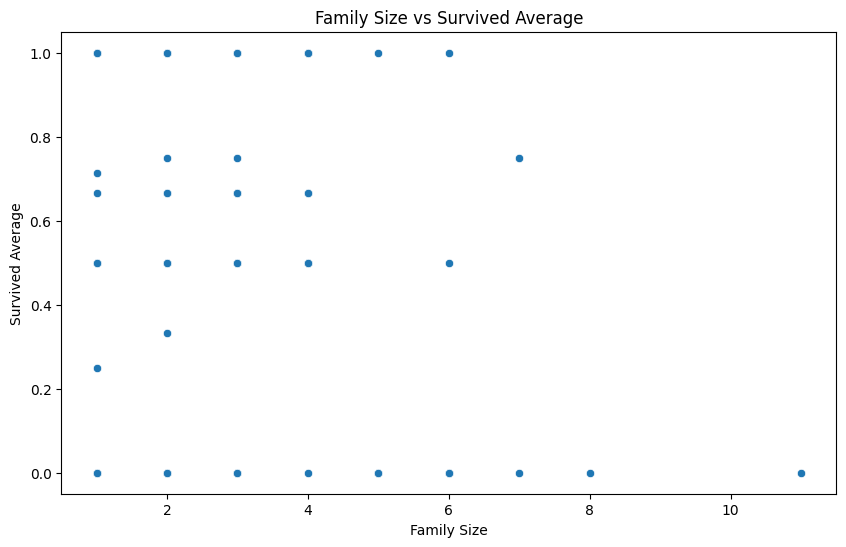

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='family_size', y='survived_avg', data=ticket_stats)

plt.title('Family Size vs Survived Average')
plt.xlabel('Family Size')
plt.ylabel('Survived Average')

plt.show()

In [48]:
# 1
# df_train_onehot

columns_to_select_onehot = [
    'Survived','Sex_new_female','Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q', 'Embarked_new_S'
]

df_train_onehot = df_train[columns_to_select_onehot]

df_train_onehot.head()

,Survived,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S
0,0,0,1,0,0,1
1,1,1,0,1,0,0
2,1,1,0,0,0,1
3,1,1,0,0,0,1
4,0,0,1,0,0,1


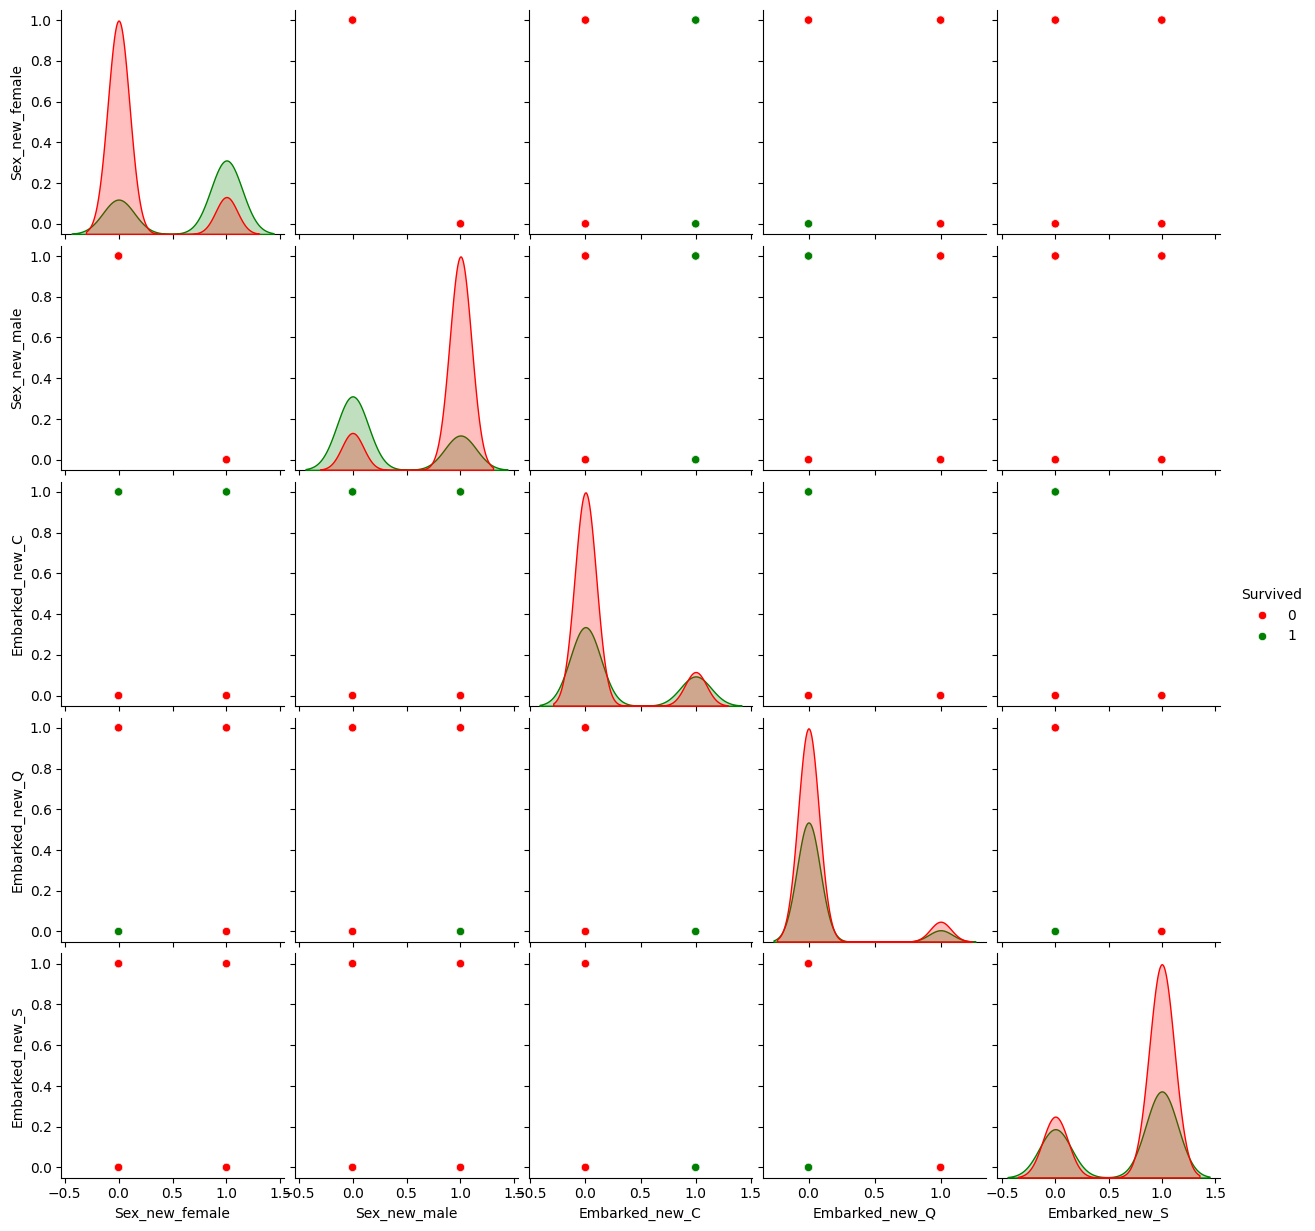

In [49]:
# df_encoded = df_train_onehot.select_dtypes(include=[np.number])

palette = {0: "red", 1: "green"}

sb.pairplot(df_train_onehot, hue="Survived", palette=palette)

In [50]:
# 1
# df_train_label

columns_to_select_label = [
    'Survived', 'Sex_labeled', 'Embarked_labeled'
]

df_train_label = df_train[columns_to_select_label]

df_train_label.head()

,Survived,Sex_labeled,Embarked_labeled
0,0,1,2
1,1,0,0
2,1,0,2
3,1,0,2
4,0,1,2


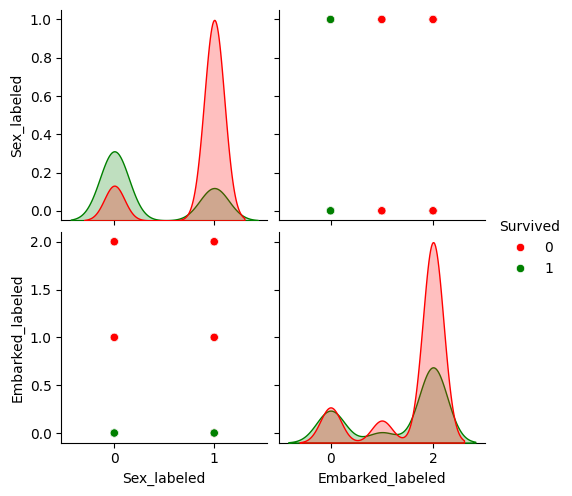

In [51]:
palette = {0: "red", 1: "green"}

sb.pairplot(df_train_label, hue="Survived", palette=palette)

In [52]:
# 1
# 相關係數矩陣，選擇onehot

# 選取數值欄位
df_train_encoded = df_train.select_dtypes(include=[np.number])

#
correlation_matrix = df_train_encoded.corr().round(2)
correlation_matrix.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_new_female,Sex_new_male,Embarked_new_C,...,AgeGroup,AgeBin_Code_4,Family_size,Title_3_new_Master,Title_3_new_Miss,Title_3_new_Mr,Title_3_new_Mrs,Title_3_new_Officer,Title_3_new_Royalty,FareBin_Code_6
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01,-0.04,0.04,-0.00,...,0.02,0.04,-0.04,-0.03,-0.07,0.04,0.01,0.06,0.01,-0.02
Survived,-0.01,1.00,-0.34,-0.07,-0.04,0.08,0.26,0.54,-0.54,0.17,...,-0.07,-0.03,0.02,0.09,0.33,-0.55,0.34,-0.03,0.02,0.33
Pclass,-0.04,-0.34,1.00,-0.41,0.08,0.02,-0.55,-0.13,0.13,-0.24,...,-0.30,-0.44,0.07,0.08,-0.01,0.14,-0.15,-0.15,-0.11,-0.70
Age,0.04,-0.07,-0.41,1.00,-0.25,-0.18,0.12,-0.11,0.11,0.04,...,0.87,0.88,-0.26,-0.37,-0.28,0.21,0.16,0.18,0.07,0.15
SibSp,-0.06,-0.04,0.08,-0.25,1.00,0.41,0.16,0.11,-0.11,-0.06,...,-0.20,-0.22,0.89,0.35,0.08,-0.25,0.06,-0.02,-0.00,0.36


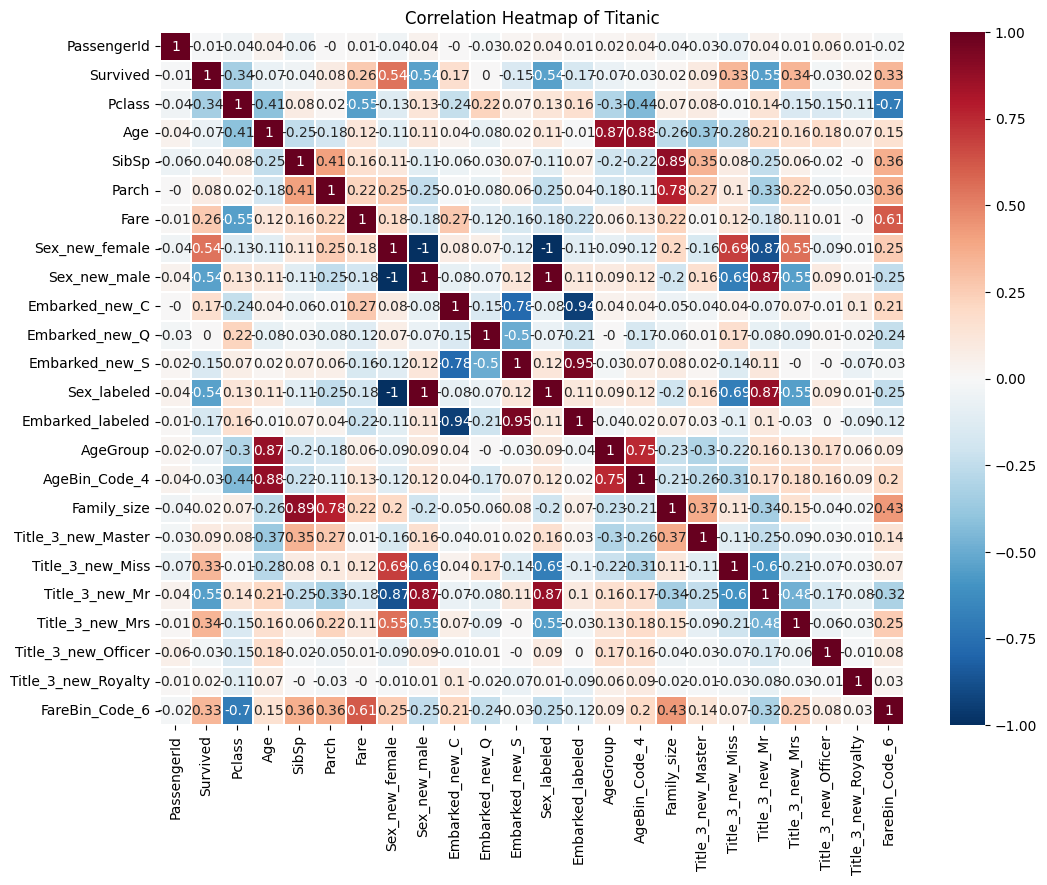

Survived               1.00
Sex_new_female         0.54
Title_3_new_Mrs        0.34
Title_3_new_Miss       0.33
FareBin_Code_6         0.33
Fare                   0.26
Embarked_new_C         0.17
Title_3_new_Master     0.09
Parch                  0.08
Title_3_new_Royalty    0.02
Family_size            0.02
Embarked_new_Q         0.00
PassengerId           -0.01
Title_3_new_Officer   -0.03
AgeBin_Code_4         -0.03
SibSp                 -0.04
AgeGroup              -0.07
Age                   -0.07
Embarked_new_S        -0.15
Embarked_labeled      -0.17
Pclass                -0.34
Sex_new_male          -0.54
Sex_labeled           -0.54
Title_3_new_Mr        -0.55
Name: Survived, dtype: float64


In [53]:
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r',linewidths=0.2)
fig=plt.gcf()
plt.title("Correlation Heatmap of Titanic")
plt.show()

print(correlation_matrix['Survived'].sort_values(ascending=False))

# 性別: 女性 > 男性

# 艙等: 高艙等 > 低艙等
# 艙位等級與存活呈現負相關。1為一等艙，表示越高等級的艙位，存活率越高

# 票價: 高票價 > 低票價
# 票價與存活呈現正相關，票價越高，存活率越高

# 登船港口: Cherbourg > Southampton

# Parch 相關係數為 0.08，有父母或子女在船上的乘客，存活率略高

# SibSp 相關係數為 -0.04，有兄弟姐妹或配偶在船上的乘客，存活率的更低，但影響非常小

# Family_size 為 0.02，家庭成員總數與存活率幾乎沒有相關性

# AgeBin_Code_4 為 -0.03， 表示這種年齡分箱對生還機率幾乎沒有影響
# Age 為 -0.07, 年齡越大，生還的機率略低，但影響非常小
# AgeGroup 為 -0.07, 年齡越大，生還的機率略低，但影響非常小

# 稱謂提供了對生還機率的有用信息，特別是區分不同性別和年齡段
# Title_3_new_Mrs 為 0.34 、Title_3_new_Miss 為 0.33，與 Survived 有中等程度的正相關，表明稱謂為 "Mrs" 的人（已婚女性）、 "Miss" 的人（未婚女性）生還的機率較高
# Title_3_new_Master 為 0.09 ，與 Survived 有較弱的正相關，表明稱謂為 "Master" 的人（年輕男性）生還的機率略高
# Title_3_new_Officer 為 -0.03 ，與 Survived 的負相關非常弱，表示稱謂為 "Officer" 的人在生還機率上幾乎沒有影響
# Title_3_new_Mr 為 -0.55， 與 Survived 的負相關中等偏強，表明稱謂為 "Mr" 的人（成年男性）生還的機率較低

# 總體來看，性別、票價和艙等是對生還機率影響較大的特徵，而年齡和登船港口的影響則較小


In [54]:
# 1
# 特徵重要性

from sklearn.ensemble import RandomForestClassifier

X = df_train_encoded.drop(['Survived'], axis=1)
y = df_train_encoded['Survived']

# 建立並擬合模型
model = RandomForestClassifier()
model.fit(X, y)

# 計算特徵重要性
feature_importance = model.feature_importances_

#
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,PassengerId,0.148648
5,Fare,0.137337
2,Age,0.111854
18,Title_3_new_Mr,0.085225
7,Sex_new_male,0.075830
1,Pclass,0.058506
11,Sex_labeled,0.055285
22,FareBin_Code_6,0.048752
6,Sex_new_female,0.046224
15,Family_size,0.042511


In [55]:
print(df_train.columns)
print(df_train_encoded.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_new_female',
       'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q', 'Embarked_new_S',
       'Sex_labeled', 'Embarked_labeled', 'AgeGroup', 'AgeBin_Code_4',
       'Family_size', 'Title_3_new_Master', 'Title_3_new_Miss',
       'Title_3_new_Mr', 'Title_3_new_Mrs', 'Title_3_new_Officer',
       'Title_3_new_Royalty', 'FareBin_Code_6'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q',
       'Embarked_new_S', 'Sex_labeled', 'Embarked_labeled', 'AgeGroup',
       'AgeBin_Code_4', 'Family_size', 'Title_3_new_Master',
       'Title_3_new_Miss', 'Title_3_new_Mr', 'Title_3_new_Mrs',
       'Title_3_new_Officer', 'Title_3_new_Royalty', 'FareBin_Code_6'],
      dtype='object')


In [56]:
# 2
# 查看年齡分怖

## matplotlib
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df_train['Age'], color='skyblue')
# plt.title('Age Quartiles')
# plt.xlabel('Age')
# plt.show()


fig = px.box(df_train, y='Age', points='all', color_discrete_sequence=['blue'])

#
fig.update_layout(
    title='Age Quartiles',
    yaxis_title='Age',
    xaxis_title='',
    width=800,
    height=600
)

fig.show()

In [57]:
# 2
# 各年齡組存活率

# agegroup_survival = df_train.groupby('AgeGroup')['Survived'].mean()

# #
# plt.figure(figsize=(10, 6))
# agegroup_survival.plot(kind='bar', color='skyblue')
# plt.title('Survival Rate by Age Group')
# plt.xlabel('Age Group')
# plt.ylabel('Survival Rate')
# plt.xticks(rotation=0)
# plt.show()

# #
# print(agegroup_survival)



agegroup_survival = df_train.groupby('AgeGroup')['Survived'].mean().reset_index()

#
fig = px.bar(
    agegroup_survival,
    x='AgeGroup',
    y='Survived',
    title='Survival Rate by Age Group',
    labels={'Survived': 'Survival Rate', 'AgeGroup': 'Age Group'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()

In [58]:
# 2
# 各年齡組存活率

agegroup_survival = df_train.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    agegroup_survival,
    x='AgeGroup',
    y='Survived',
    title='Survival Rate by AgeGroup and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'AgeGroup': 'AgeGroup'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()

In [59]:
# 2
# 各年齡組存活人數

agegroup_survival_counts = df_train.groupby(['AgeGroup', 'Survived']).size().unstack()

# 顯示未存活的人數
trace1 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[0],
    name='Not Survived',
    marker_color='lightcoral'
)

# 顯示存活的人數
trace2 = go.Bar(
    x=agegroup_survival_counts.index,
    y=agegroup_survival_counts[1],
    name='Survived',
    marker_color='lightgreen'
)

#
fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(barmode='group')

fig.update_layout(
    title='Passenger Count by Age Group and Survival Status',
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Survival Status',
    width=1000,
    height=600
)

fig.show()

#
print(agegroup_survival_counts)

Survived    0    1
AgeGroup          
0          98   82
1         379  217
2          62   42
3          10    1


In [60]:
# 3
# 各艙等存活率

pclass_survival = df_train.groupby('Pclass')['Survived'].mean().reset_index()

#
fig = px.bar(
    pclass_survival,
    x='Pclass',
    y='Survived',
    title='Survival Rate by Pclass',
    labels={'Survived': 'Survival Rate', 'Pclass': 'Pclass'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [61]:
# 3
# 各艙等存活率

# sns.countplot(x='Embarked', hue='Survived', data=df_train)
# plt.xlabel('Embarked')
# plt.ylabel('Count')
# plt.title('Survived count by Embarked')
# plt.show()



pclass_sex_survival = df_train.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    pclass_sex_survival,
    x='Pclass',
    y='Survived',
    title='Survival Rate by Pclass and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'Pclass': 'Pclass'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [62]:
# 4
# 各港口存活率

embarked_survival = df_train.groupby('Embarked')['Survived'].mean().reset_index()

#
fig = px.bar(
    embarked_survival,
    x='Embarked',
    y='Survived',
    title='Survival Rate by Embarked',
    labels={'Survived': 'Survival Rate', 'Embarked': 'Embarked'},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


In [63]:
# 4
# 各港口存活率

embarked_survival = df_train.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

#
fig = px.bar(
    embarked_survival,
    x='Embarked',
    y='Survived',
    title='Survival Rate by Embarked and Sex',
    color='Sex',
    barmode='group',
    labels={'Survived': 'Survival Rate', 'Embarked': 'Embarked'},
    color_discrete_sequence=['lightcoral', 'lightblue']
)

fig.update_layout(xaxis_tickangle=0)

fig.update_layout(
    width=1000,
    height=600
)

fig.show()


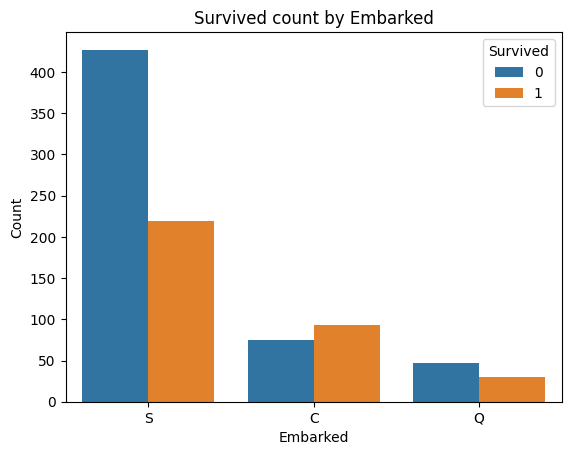

In [64]:
# 4
# 各港口存活人數

sns.countplot(x='Embarked', hue='Survived', data=df_train)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survived count by Embarked')
plt.show()

# Baseline、ML

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [66]:
df_train_encoded.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q',
       'Embarked_new_S', 'Sex_labeled', 'Embarked_labeled', 'AgeGroup',
       'AgeBin_Code_4', 'Family_size', 'Title_3_new_Master',
       'Title_3_new_Miss', 'Title_3_new_Mr', 'Title_3_new_Mrs',
       'Title_3_new_Officer', 'Title_3_new_Royalty', 'FareBin_Code_6'],
      dtype='object')

In [67]:
# 查看準確度1

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'SibSp', 'Parch'})
columns_y = ['Survived']
train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8226916075575922
0.776655577176574
0.805818843763731
0.6746218065407069
0.7385223777540644
0.7912685958194714
0.7912685958194714


In [68]:
# 查看準確度2

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'Family_size'})
columns_y = ['Survived']
train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8159500345238844
0.784514468646036
0.8103320569957944
0.6712635741635804
0.7340405498713201
0.7979787835038603
0.7979787835038603


In [69]:
# 查看準確度3

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'SibSp', 'Parch', 'AgeGroup'})
columns_y = ['Survived']
train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8226916075575922
0.77328479065972
0.8024731655263322
0.6746218065407069
0.736287740882556
0.7935095097608437
0.7935095097608437


In [70]:
# 查看準確度4

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'SibSp', 'Parch', 'AgeBin_Code_4', 'Sex_labeled', 'Embarked_labeled'})
columns_y = ['Survived']
train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8238152030632101
0.7732973447994476
0.813684012303057
0.6723746155294709
0.7317808047203566
0.7901387232439896
0.7901387232439896


In [71]:
# 查看準確度5

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'SibSp', 'Parch', 'AgeBin_Code_4', 'Sex_labeled', 'Embarked_new_C', 'Embarked_new_Q','Embarked_new_S'})
columns_y = ['Survived']
train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8226916075575922
0.7755445358106836
0.8170547988199107
0.6723746155294709
0.7284351264829578
0.7901261691042621
0.7901261691042621


In [72]:
# 查看準確度6

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'SibSp', 'Parch', 'AgeBin_Code_4', 'Sex_new_female', 'Sex_new_male', 'Embarked_labeled'})
columns_y = ['Survived']
train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.8238152030632101
0.7766493001067103
0.809189630280585
0.6734919339652251
0.7239219132508945
0.7923859142552256
0.7923859142552256


In [73]:
# 查看準確度7

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'SibSp', 'Parch', 'AgeBin_Code_4', 'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q','Embarked_new_S'})
columns_y = ['Survived']
train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

# Logistic_Regression
log = LogisticRegression(random_state=0, max_iter=3000)
scores_log = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_log)

# Decision_Tree
decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_decision_tree)

# Random_Forest_Classifier
rfc = RandomForestClassifier(n_estimators=100)
scores_rfc = cross_val_score(rfc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_rfc)

# Support_Vector_Machines
svc = SVC()
scores_svc = cross_val_score(svc, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_svc)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_knn = cross_val_score(knn, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_knn)

# Gaussian_Naive_Baye
gaussian = GaussianNB()
scores_gaussian = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gaussian)

# Gradient_Boosting_Classifier
Gradient = GradientBoostingClassifier()
scores_gradient = cross_val_score(gaussian, train_X, train_y.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_gradient)


0.824938798568828
0.7721863034335572
0.8047140794677045
0.6723746155294709
0.7216998305191137
0.7901261691042621
0.7901261691042621


In [74]:
models = pd.DataFrame({
    'Model': ['Logistic_Regression',
          'Decision_Tree',
          'Random_Forest_Classifier',
          'Support_Vector_Machines',
          'KNN',
          'Gaussian_Naive_Baye',
          'Gradient_Boosting_Classifier'],
    'Score': [scores_log,
          scores_decision_tree,
          scores_rfc,
          scores_svc,
          scores_knn,
          scores_gaussian,
          scores_gradient]
    })

models

,Model,Score
0,Logistic_Regression,0.824939
1,Decision_Tree,0.772186
2,Random_Forest_Classifier,0.804714
3,Support_Vector_Machines,0.672375
4,KNN,0.721700
5,Gaussian_Naive_Baye,0.790126
6,Gradient_Boosting_Classifier,0.790126


## 測試集

In [75]:
#  一、瞭解資料內容  Checking data content
# 環境準備，使用 Python NumPy、Pandas, Matplolib、Plotly、Seaborn
# 資料來源 Data source
# 讀取資料、查看基本訊息 Import data 、View basic information


url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/test.csv'

df_test = pd.read_csv(url)

df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [76]:
print(df_test.info())
print()
print((df_test['Cabin'].isna().sum()/df_test.shape[0]*100).round(2))
print()
print(df_test.isna().sum())

# Cabin 刪除，缺少 77%
# age 數值型，用性別、艙等平均補
# Embarked 用眾數補
# Fare 用同 Pclass 均價補

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

78.23

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [77]:
# 二、資料清理 Data cleaning

# Age，數值型，用性別、艙等平均補
df_test['Age'].fillna(value=df_test.groupby(['Sex','Pclass'])['Age'].transform('mean'),inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S


In [78]:
# Embarked，用眾數補
mode_embarked = df_test['Embarked'].mode()[0]

df_test['Embarked'].fillna(value=mode_embarked, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S


In [79]:
# Fare 用同 Sex, Pclass 均價補

df_test['Fare'].fillna(value=df_test.groupby(['Sex','Pclass'])['Fare'].transform('mean'),inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S


In [80]:
# 確認一下
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [81]:
# Sex、Embarked 轉為 One-Hot

df_test['Sex_new'] = df_test['Sex'].copy()
df_test['Embarked_new'] = df_test['Embarked'].copy()
df_test = pd.get_dummies(df_test, columns=['Sex_new', 'Embarked_new'], prefix=['Sex_new', 'Embarked_new'])

df_test['Sex_new_female'] = df_test['Sex_new_female'].astype(int)
df_test['Sex_new_male'] = df_test['Sex_new_male'].astype(int)
df_test['Embarked_new_C'] = df_test['Embarked_new_C'].astype(int)
df_test['Embarked_new_Q'] = df_test['Embarked_new_Q'].astype(int)
df_test['Embarked_new_S'] = df_test['Embarked_new_S'].astype(int)

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S,0,1,0,0,1


In [82]:
# Sex、Embarked 轉為 LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder_sex_labeled = LabelEncoder()
df_test['Sex_labeled'] = label_encoder_sex_labeled.fit_transform(df_test['Sex'])

label_encoder_embarked_labeled = LabelEncoder()
df_test['Embarked_labeled'] = label_encoder_embarked_labeled.fit_transform(df_test['Embarked'])

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,0,1,0,1,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,1,0,0,0,1,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,1,1
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,0,1,0,0,1,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1,1,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,1,2
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S,0,1,0,0,1,1,2


In [83]:
# 四、特徵工程 Feature engineering

# 年齡多一欄，設為年齡組

bins = [0, 21, 45, 65, 100]
labels = ['0-21', '22-45', '46=65', '66-100']

df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)
df_test['AgeGroup'] = df_test['AgeGroup'].cat.codes  # 轉換為數值

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,0,1,0,1,0,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,1,0,0,0,1,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,0,1,0,1,0,1,1,2
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,0,1,0,0,1,1,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,1,0,0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1,1,2,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,1,2,1
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S,0,1,0,0,1,1,2,1


In [84]:
# 年齡組均分

#
df_test['AgeBin_4'] = pd.qcut(df_test['Age'],4)

label = LabelEncoder()
df_test['AgeBin_Code_4']=label.fit_transform(df_test['AgeBin_4'])

# cross tab
df_4 = pd.crosstab(df_test['AgeBin_Code_4'],df_test['Pclass'])

display(df_4)

df_test = df_test.drop(columns=['AgeBin_4'])


Pclass,1,2,3
AgeBin_Code_4,,,
0,12,30,72
1,4,10,87
2,23,33,42
3,68,20,17


In [85]:
# 家屬多設一欄，總親屬人數

df_test['Family_size']	= df_test['SibSp'].astype(int) + df_test['Parch'].astype(int) + 1

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled,AgeGroup,AgeBin_Code_4,Family_size
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,...,0,1,0,1,0,1,1,1,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,...,1,0,0,0,1,0,2,2,3,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,...,0,1,0,1,0,1,1,2,3,1
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,...,0,1,0,0,1,1,2,1,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,...,1,0,0,0,1,0,2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,...,0,1,0,0,1,1,2,1,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,...,1,0,1,0,0,0,0,1,3,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,1,0,0,1,1,2,1,3,1
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,...,0,1,0,0,1,1,2,1,1,1


In [86]:
# 提取名字中的頭銜

df_test['Title'] = df_test['Name'].str.split(", ", expand=True)[1]
df_test['Title_2'] = df_test['Title'].str.split(". ", expand=True)[0]

# Officer　專業人士：Captain、Colonel、Major、Doctor、Reverend
# Royalty　特殊地位：Jonkheer、Don、Sir、the Countess、Dona、Lady

title_encoding = {
  "Capt":"Officer",
  "Col":"Officer",
  "Major":"Officer",
  "Jonkheer":"Royalty",
  "Don":"Royalty",
  "Sir":"Royalty",
  "Dr":"Officer",
  "Rev": "Officer",
  "the Countess":"Royalty",
  "Dona":"Royalty",
  "Mme":"Mrs",
  "Mlle":"Miss",
  "Ms":"Mrs",
  "Mr":"Mr",
  "Mrs":"Mrs",
  "Miss":"Miss",
  "Master":"Master",
  "Lady":"Royalty"
}

df_test['Title_3'] = df_test['Title_2'].map(title_encoding)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_new_Q,Embarked_new_S,Sex_labeled,Embarked_labeled,AgeGroup,AgeBin_Code_4,Family_size,Title,Title_2,Title_3
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,...,1,0,1,1,1,2,1,Mr. James,Mr,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,...,0,1,0,2,2,3,2,Mrs. James (Ellen Needs),Mrs,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,...,1,0,1,1,2,3,1,Mr. Thomas Francis,Mr,Mr
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,...,0,1,1,2,1,2,1,Mr. Albert,Mr,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,...,0,1,0,2,1,0,3,Mrs. Alexander (Helga E Lindqvist),Mrs,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,...,0,1,1,2,1,1,1,Mr. Woolf,Mr,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,...,0,0,0,0,1,3,1,Dona. Fermina,Dona,Royalty
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,1,1,2,1,3,1,Mr. Simon Sivertsen,Mr,Mr
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,...,0,1,1,2,1,1,1,Mr. Frederick,Mr,Mr


In [87]:
# Title_3轉為One-Hot

df_test['Title_3_new'] = df_test['Title_3'].copy()
df_test = pd.get_dummies(df_test, columns=['Title_3_new'], prefix=['Title_3_new'])

df_test['Title_3_new_Master'] = df_test['Title_3_new_Master'].astype(int)
df_test['Title_3_new_Miss'] = df_test['Title_3_new_Miss'].astype(int)
df_test['Title_3_new_Mr'] = df_test['Title_3_new_Mr'].astype(int)
df_test['Title_3_new_Mrs'] = df_test['Title_3_new_Mrs'].astype(int)
df_test['Title_3_new_Officer'] = df_test['Title_3_new_Officer'].astype(int)
df_test['Title_3_new_Royalty'] = df_test['Title_3_new_Royalty'].astype(int)

df_test = df_test.drop(columns=['Title','Title_2','Title_3'])

df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_labeled,AgeGroup,AgeBin_Code_4,Family_size,Title_3_new_Master,Title_3_new_Miss,Title_3_new_Mr,Title_3_new_Mrs,Title_3_new_Officer,Title_3_new_Royalty
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,...,1,1,2,1,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,...,2,2,3,2,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,...,1,2,3,1,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,...,2,1,2,1,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,...,2,1,0,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,...,2,1,1,1,0,0,1,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,...,0,1,3,1,0,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,2,1,3,1,0,0,1,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,...,2,1,1,1,0,0,1,0,0,0


In [88]:
# 票價

# Making Binsl
df_test['FareBin_6'] = pd.qcut(df_test['Fare'],6)

label = LabelEncoder()
df_test['FareBin_Code_6']=label.fit_transform(df_test['FareBin_6'])

# cross tab
df_6 = pd.crosstab(df_test['FareBin_Code_6'],df_test['Pclass'])

display(df_6)

Pclass,1,2,3
FareBin_Code_6,,,
0,2,0,68
1,0,0,76
2,0,42,23
3,8,30,38
4,37,16,8
5,60,5,5


In [89]:
df_test_encoded = df_test.select_dtypes(include=[np.number])

# 模型

In [90]:
print(df_train_encoded.columns)
print(df_test_encoded.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q',
       'Embarked_new_S', 'Sex_labeled', 'Embarked_labeled', 'AgeGroup',
       'AgeBin_Code_4', 'Family_size', 'Title_3_new_Master',
       'Title_3_new_Miss', 'Title_3_new_Mr', 'Title_3_new_Mrs',
       'Title_3_new_Officer', 'Title_3_new_Royalty', 'FareBin_Code_6'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q',
       'Embarked_new_S', 'Sex_labeled', 'Embarked_labeled', 'AgeGroup',
       'AgeBin_Code_4', 'Family_size', 'Title_3_new_Master',
       'Title_3_new_Miss', 'Title_3_new_Mr', 'Title_3_new_Mrs',
       'Title_3_new_Officer', 'Title_3_new_Royalty', 'FareBin_Code_6'],
      dtype='object')


In [91]:
# 選擇要放進模型的欄位，一定要int
# 前面查看準確度，選擇準確度最高， columns - {'Survived', 'PassengerId', 'SibSp', 'Parch', 'AgeBin_Code_4', 'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q','Embarked_new_S'}

columns_X = list(set(df_train_encoded.columns) - {'Survived', 'PassengerId', 'SibSp', 'Parch', 'AgeBin_Code_4', 'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q','Embarked_new_S'})
columns_y = ['Survived']


train_X = df_train_encoded[columns_X]
train_y = df_train_encoded[columns_y]

In [92]:
columns_test_X = list(set(df_test_encoded.columns) - {'SibSp', 'Parch', 'PassengerId', 'SibSp', 'Parch', 'AgeBin_Code_4', 'Sex_new_female', 'Sex_new_male', 'Embarked_new_C', 'Embarked_new_Q','Embarked_new_S'})

test_X = df_test_encoded[columns_test_X]

In [93]:
# Random_Forest_Classifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(train_X, train_y.values.ravel())

#
test_y_list = rfc.predict(test_X)

df_test_encoded['Survived_pred'] = test_y_list

df_test_encoded.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,...,AgeBin_Code_4,Family_size,Title_3_new_Master,Title_3_new_Miss,Title_3_new_Mr,Title_3_new_Mrs,Title_3_new_Officer,Title_3_new_Royalty,FareBin_Code_6,Survived_pred
0,892,3,34.5,0,0,7.8292,0,1,0,1,...,2,1,0,0,1,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,...,3,2,0,0,0,1,0,0,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,...,3,1,0,0,1,0,0,0,2,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,...,2,1,0,0,1,0,0,0,1,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,...,0,3,0,0,0,1,0,0,2,1


In [94]:
test_y = df_test_encoded[['Survived_pred']]

In [95]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(891, 14)
(891, 1)
(418, 14)
(418, 1)


In [96]:
# 測試集真正的結果

url = 'https://raw.githubusercontent.com/06Cata/Kaggle_Titanic/main/raw_data/gender_submission.csv'

df_test_result = pd.read_csv(url)

df_test_result.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [97]:
df_test_total = pd.merge(df_test_encoded, df_test_result, on='PassengerId')
df_test_total

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,...,Family_size,Title_3_new_Master,Title_3_new_Miss,Title_3_new_Mr,Title_3_new_Mrs,Title_3_new_Officer,Title_3_new_Royalty,FareBin_Code_6,Survived_pred,Survived
0,892,3,34.500000,0,0,7.8292,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,893,3,47.000000,1,0,7.0000,1,0,0,0,...,2,0,0,0,1,0,0,0,0,1
2,894,2,62.000000,0,0,9.6875,0,1,0,1,...,1,0,0,1,0,0,0,2,0,0
3,895,3,27.000000,0,0,8.6625,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
4,896,3,22.000000,1,1,12.2875,1,0,0,0,...,3,0,0,0,1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.525104,0,0,8.0500,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
414,1306,1,39.000000,0,0,108.9000,1,0,1,0,...,1,0,0,0,0,0,1,5,1,1
415,1307,3,38.500000,0,0,7.2500,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
416,1308,3,24.525104,0,0,8.0500,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


Train Loss: 0.1159
Test Loss: 0.1681


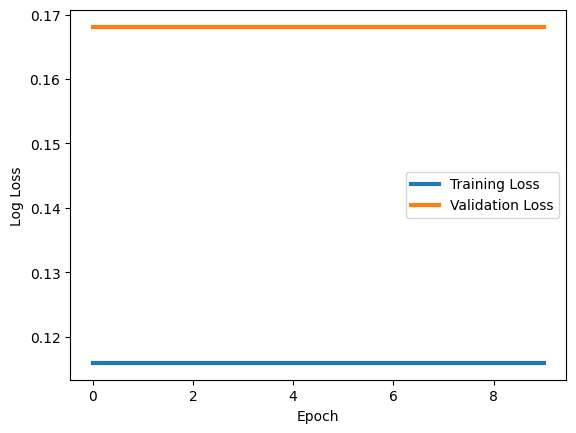

In [98]:
# 計算損失率，隨機森林模型的訓練和測試損失率都是固定的

from sklearn.metrics import log_loss

train_proba = rfc.predict_proba(train_X)
train_loss = log_loss(train_y, train_proba)

test_proba = rfc.predict_proba(test_X)
test_loss = log_loss(test_y, test_proba)

print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# 畫出損失率
loss_list = [train_loss] * 10  # 模擬多個 epoch 的訓練損失
test_loss_list = [test_loss] * 10  # 模擬多個 epoch 的測試損失

plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.show()

In [99]:
# 準確率

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_test_total['Survived'], df_test_total['Survived_pred'])
print(f"Accuracy: {accuracy}")

Accuracy: 0.8181818181818182


## 神經網絡，計算每個訓練和迭代的損失

In [100]:
# TensorFlow, to_categorical ，目標變數進行獨熱編碼
# PyTorch 創建神經網路模型

import tensorflow as tf
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score


train_y_onehot = tf.keras.utils.to_categorical(train_y, num_classes=2)  # 兩個類別，0 和 1
test_y_onehot = tf.keras.utils.to_categorical(test_y, num_classes=2)

print(train_y_onehot.shape)
print(test_y_onehot.shape)

(891, 2)
(418, 2)


In [101]:
# 創建模型架構
!pip install optuna
import optuna
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)    #  input_size 維度的輸入，輸出 hidden_size  # 線性層
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)   #  hidden_size 維度的輸入，同樣輸出 hidden_size 維度的特徵
        self.predict = torch.nn.Linear(hidden_size, output_size)   # hidden_size 維度的特徵映射到 output_size 維度，用於預測目標類別

    def forward(self, x):
        output1 = F.relu(self.hidden1(x))
        output2 = F.relu(self.hidden2(output1))
        output = self.predict(output2)
        return output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


In [102]:
#  要執行超久，用colab gpu
# 定義超參數優化目標函數

def MAE_calc(trial, Xs, Ys, n_iters=20):
    # 設定試驗的超參數
    input_size = Xs.shape[1]
    hidden_size = trial.suggest_int('hidden_size', 16, 128)
    output_size = 2
    batch_size = trial.suggest_int('batch_size', 16, 128)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    num_epochs = trial.suggest_int('num_epochs', 10, 100)

    model = Model(input_size, hidden_size, output_size)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    loss_func = torch.nn.CrossEntropyLoss()

    # 創建數據加載器
    dataset = TensorDataset(torch.tensor(Xs, dtype=torch.float32), torch.tensor(Ys, dtype=torch.long))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    MAE_List = []
    for _ in tqdm(range(n_iters)):
        kf = KFold(n_splits=5, shuffle=True)
        for train_index, test_index in kf.split(Xs):
            X_train, X_test = Xs[train_index], Xs[test_index]
            Y_train, Y_test = Ys[train_index], Ys[test_index]

            scaler = StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            # 訓練模型
            for epoch in range(num_epochs):
                for batch_X, batch_y in dataloader:
                    prediction = model(batch_X)
                    loss = loss_func(prediction, batch_y)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            with torch.no_grad():
                predictions = torch.argmax(model(torch.tensor(X_test, dtype=torch.float32)), dim=1).numpy()
                MAE_List.append(MAE(Y_test, predictions))

    return np.mean(MAE_List)


In [103]:
# 設定 Optuna 優化
def target_func(trial):
    # 在這裡需要確保 Xs 和 Ys 是可用的
    return MAE_calc(trial, Xs=np.array(train_X.values), Ys=np.array(train_y.values.ravel()))

sampler = optuna.samplers.TPESampler()
study = optuna.create_study(sampler=sampler, direction='minimize')

# 開始優化
study.optimize(target_func, n_trials=5) # 可以設個100次

print('Best hyperparameters:', study.best_params)
print('Best value:', study.best_value)

[I 2024-09-01 07:17:27,219] A new study created in memory with name: no-name-3cbeb0d6-2249-4400-aa21-cc51265388d0
<ipython-input-102-e86c855f05d6>:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

100%|██████████| 20/20 [01:21<00:00,  4.10s/it]
[I 2024-09-01 07:18:50,227] Trial 0 finished with value: 0.22312535308517986 and parameters: {'hidden_size': 42, 'batch_size': 125, 'learning_rate': 0.03293340142535018, 'num_epochs': 34}. Best is trial 0 with value: 0.22312535308517986.
<ipython-input-102-e86c855f05d6>:10: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

100%|██████████| 20/20 [02:32<00:00,  7.62s/it]
[I 2024-09-01 07:21:22,682] Trial 1 finished with value: 0.58047

Best hyperparameters: {'hidden_size': 42, 'batch_size': 125, 'learning_rate': 0.03293340142535018, 'num_epochs': 34}
Best value: 0.22312535308517986


In [104]:
# 最佳超參數訓練
best_params = study.best_params
input_size = train_X.shape[1]
model = Model(input_size, best_params['hidden_size'], 2)
optimizer = torch.optim.SGD(model.parameters(), lr=best_params['learning_rate'], momentum=0.9)
loss_func = torch.nn.CrossEntropyLoss()


# 訓練模型
train_X_data = torch.tensor(train_X.values, dtype=torch.float32)
train_y_data = torch.tensor(train_y.values.ravel(), dtype=torch.long)
test_X_data = torch.tensor(test_X.values, dtype=torch.float32)
test_y_data = torch.tensor(test_y.values.ravel(), dtype=torch.long)
dataset = TensorDataset(train_X_data, train_y_data)
dataloader = DataLoader(dataset, batch_size=best_params['batch_size'], shuffle=True)

loss_list = []
test_loss_list = []

for epoch in range(best_params['num_epochs']):
    for batch_X, batch_y in dataloader:
        prediction = model(batch_X)
        loss = loss_func(prediction, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

         # 計算並記錄訓練集損失
        loss = loss_func(model(train_X_data), train_y_data)
        loss_list.append(loss.item())

        # 計算並記錄測試集損失
        test_loss = loss_func(model(test_X_data), test_y_data)
        test_loss_list.append(test_loss.item())

        # 印出每個 epoch 訓練和測試損失
        print(f'Epoch [{epoch+1}/{best_params["num_epochs"]}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


# 評估模型準確率
model.eval()
with torch.no_grad():
    train_predictions = torch.argmax(model(train_X_data), dim=1).numpy()
    test_predictions = torch.argmax(model(torch.tensor(test_X.values, dtype=torch.float32)), dim=1).numpy()

train_accuracy = accuracy_score(train_y, train_predictions)
test_accuracy = accuracy_score(test_y, test_predictions)

print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch [1/34], Train Loss: 1.0944, Test Loss: 1.1610
Epoch [1/34], Train Loss: 0.9575, Test Loss: 1.0349
Epoch [1/34], Train Loss: 0.9103, Test Loss: 0.9370
Epoch [1/34], Train Loss: 0.8256, Test Loss: 0.8376
Epoch [1/34], Train Loss: 0.6293, Test Loss: 0.6375
Epoch [1/34], Train Loss: 0.6842, Test Loss: 0.6853
Epoch [1/34], Train Loss: 0.7210, Test Loss: 0.7220
Epoch [1/34], Train Loss: 0.6780, Test Loss: 0.6832
Epoch [2/34], Train Loss: 0.6411, Test Loss: 0.6487
Epoch [2/34], Train Loss: 0.6254, Test Loss: 0.6349
Epoch [2/34], Train Loss: 0.6185, Test Loss: 0.6286
Epoch [2/34], Train Loss: 0.6129, Test Loss: 0.6237
Epoch [2/34], Train Loss: 0.6097, Test Loss: 0.6200
Epoch [2/34], Train Loss: 0.6079, Test Loss: 0.6186
Epoch [2/34], Train Loss: 0.6091, Test Loss: 0.6182
Epoch [2/34], Train Loss: 0.6081, Test Loss: 0.6194
Epoch [3/34], Train Loss: 0.6084, Test Loss: 0.6200
Epoch [3/34], Train Loss: 0.6095, Test Loss: 0.6204
Epoch [3/34], Train Loss: 0.6129, Test Loss: 0.6252
Epoch [3/34]

In [105]:
# # 模型、優化器初始化

# model = Model(test_X.shape[1], 32, 2)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9) # 使用 momentum 來加速訓練
# loss_func = torch.nn.CrossEntropyLoss()  # 多類別分類問題的損失函數

# # 資料格式轉換為 torch 張量
# train_X_data = torch.tensor(train_X.values, dtype=torch.float32)
# train_y_data = torch.tensor(train_y.values.ravel(), dtype=torch.long)  # 使用 ravel() 攤平成一維
# test_X_data = torch.tensor(test_X.values, dtype=torch.float32)
# test_y_data = torch.tensor(test_y.values.ravel(), dtype=torch.long)  # 使用 ravel() 攤平成一維


# batch_size = 64
# num_epochs = 150
# num_batches = len(train_X) // batch_size
# loss_list = []
# test_loss_list = []

# for epoch in range(num_epochs):
#     for i in range(num_batches):
#         start = i * batch_size
#         end = start + batch_size
#         prediction = model(train_X_data[start:end])
#         loss = loss_func(prediction, train_y_data[start:end])

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     # 計算訓練集損失
#     loss = loss_func(model(train_X_data), train_y_data)
#     loss_list.append(loss.item())

#     # 計算測試集損失
#     test_loss = loss_func(model(test_X_data), test_y_data)
#     test_loss_list.append(test_loss.item())

#     # 印出每個 epoch 訓練和測試損失
#     print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# # 訓練完成後，評估模型準確率
# model.eval()
# with torch.no_grad():
#     train_predictions = torch.argmax(model(train_X_data), dim=1).numpy()
#     test_predictions = torch.argmax(model(test_X_data), dim=1).numpy()

# train_accuracy = accuracy_score(train_y, train_predictions)
# test_accuracy = accuracy_score(test_y_data, test_predictions)

# print(f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


In [106]:
# 資料格式轉換為 torch 張量
x_test_data = torch.tensor(test_X.values, dtype=torch.float32)

# 使用模型進行預測
with torch.no_grad():
    y_pred = model(x_test_data)
    y_pred = y_pred.argmax(1).numpy()  # one hot array to int array

df_test_total['Survived_pred_pytorch'] = y_pred

df_test_total

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_new_female,Sex_new_male,Embarked_new_C,Embarked_new_Q,...,Title_3_new_Master,Title_3_new_Miss,Title_3_new_Mr,Title_3_new_Mrs,Title_3_new_Officer,Title_3_new_Royalty,FareBin_Code_6,Survived_pred,Survived,Survived_pred_pytorch
0,892,3,34.500000,0,0,7.8292,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,893,3,47.000000,1,0,7.0000,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,894,2,62.000000,0,0,9.6875,0,1,0,1,...,0,0,1,0,0,0,2,0,0,0
3,895,3,27.000000,0,0,8.6625,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,896,3,22.000000,1,1,12.2875,1,0,0,0,...,0,0,0,1,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,24.525104,0,0,8.0500,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
414,1306,1,39.000000,0,0,108.9000,1,0,1,0,...,0,0,0,0,0,1,5,1,1,1
415,1307,3,38.500000,0,0,7.2500,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
416,1308,3,24.525104,0,0,8.0500,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


Text(0, 0.5, 'BCE Loss')

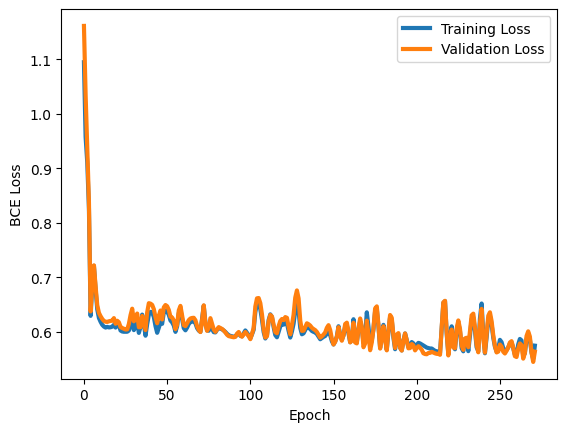

In [107]:
# 損失率

plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [108]:
# 準確率

accuracy_score(test_y, y_pred)

0.6866028708133971

# 集成


In [112]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split
from tqdm import tqdm


# 參數設置
n_iter = 20
n_splits = 5

# 初始化相關矩陣
corr_matrix = np.zeros((3, 3))

# 開始迭代交叉驗證
for _ in tqdm(range(n_iter)):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    XY_folds = {}
    for i, (train_index, test_index) in enumerate(kf.split(train_X)):
        XY_folds[i] = (np.array(train_index), np.array(test_index))

    for i in range(n_splits):
        # 定義模型
        model_A = LogisticRegression(random_state=42)
        model_B = GaussianNB()
        model_C = GradientBoostingClassifier(n_estimators=100, random_state=42)

        # 準備數據
        X_train = np.array(train_X)[XY_folds[i][0]]
        X_test = np.array(train_X)[XY_folds[i][1]]
        Y_train = np.array(train_y)[XY_folds[i][0]]
        Y_test = np.array(train_y)[XY_folds[i][1]]

        # 訓練模型
        model_A.fit(X_train, Y_train)
        model_B.fit(X_train, Y_train)
        model_C.fit(X_train, Y_train)

        # 預測
        preds = [model_A.predict(X_test),
                 model_B.predict(X_test),
                 model_C.predict(X_test)]

        # 計算誤差
        errs = [p - Y_test for p in preds]

        # 更新相關矩陣
        for i in range(3):
            for j in range(3):
                corr_matrix[i][j] += np.mean(errs[i] * errs[j]) / 100


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3

In [118]:
from scipy.optimize import minimize  # 添加這行代碼來導入 minimize 函數

# 求解最佳權重
def solve_optimal_weights(corr_matrix):
    N = corr_matrix.shape[0]

    def objective(weights):
        return weights.T @ corr_matrix @ weights

    # 全中總和為1
    initial_weights = np.array([1/N] * N)
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = [(0, 1)] * N

    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    optimal_weights = result.x

    return optimal_weights

In [119]:
weights_A = np.array([1.0, 1.0, 1.0])
weights_A /= np.sum(weights_A)
weights_B = np.array([1/x**2 for x in np.diag(corr_matrix)])
weights_B /= np.sum(weights_B)
weights_C = solve_optimal_weights(corr_matrix)

Ws = [weights_A, weights_B, weights_C]
weight_labels = ['Uniform Weights', 'Inverse Square Weights', 'L.A. Solved Weights']

ensemble_mae_dict = {
    'LogisticRegression': [],
    'GaussianNB': [],
    'Gradient_Boosting_Classifier': [],
    'Uniform Weights': [],
    'Inverse Square Weights': [],
    'L.A. Solved Weights': []
}

# Ensemble evaluation
for _ in tqdm(range(10)):
    model_A = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
    model_B = SVC(probability=True, random_state=42)
    model_C = KNeighborsClassifier(n_neighbors=5)

    X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)

    model_A.fit(X_train, Y_train)
    model_B.fit(X_train, Y_train)
    model_C.fit(X_train, Y_train)

    # Predictions
    preds = [model_A.predict(X_test),
             model_B.predict(X_test),
             model_C.predict(X_test)]

    ensemble_mae_dict['LogisticRegression'].append(MAE(Y_test, preds[0]))
    ensemble_mae_dict['GaussianNB'].append(MAE(Y_test, preds[1]))
    ensemble_mae_dict['Gradient_Boosting_Classifier'].append(MAE(Y_test, preds[2]))

    # Ensemble predictions
    for i, this_w in enumerate(Ws):
        this_pred = np.sum([preds[j] * this_w[j] for j in range(3)], axis=0)
        this_mae = MAE(Y_test, this_pred)
        ensemble_mae_dict[weight_labels[i]].append(this_mae)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

 10%|█         | 1/10 [00:00<00:02,  3.26it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/lo

In [120]:
EMD = {
    '': [k for k in ensemble_mae_dict.keys()],
    'MAE': [np.mean(v) for v in ensemble_mae_dict.values()]
}

pd.DataFrame(EMD).set_index('')

,MAE
,
LogisticRegression,0.145251
GaussianNB,0.335196
Gradient_Boosting_Classifier,0.245810
Uniform Weights,0.242086
Inverse Square Weights,0.240943
L.A. Solved Weights,0.255798


from matplotlib import pyplot as plt
_df_0['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)